# 구간별 차로변경횟수: 남양주TG, 양양방향
* cell별 지나간 차량대수

# Imports

In [2]:
import numpy as np
import pandas as pd
import math
import os

from tqdm import tqdm

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load Dataset

In [3]:
data_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/27_남양주영업소_드론영상분석/양양방향/01_density_by_target_LOS_concated_lanechange'

In [4]:
save_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/38_22-10차 회의 준비/221021_남양주TG 차로변경 위치 플로팅/'

In [5]:
file_list = os.listdir(data_dir)
file_list = file_list[3:]
print(file_list)

['04_1_A.csv', '04_2_A.csv']


In [8]:
file_list[0][:4]

'04_1'

# Color Palette
`px.colors.sequential.Viridis`

In [9]:
palette_ryb = ['#00b0f0', '#ffff00', '#ff5050'] # 엇갈림구간 프로젝트의 그 삼색팔레트 : 파랑-노랑-빨강

In [10]:
palette_redwhite = ['#ffffff', '#ff0000']

In [11]:
palette_bluewhite = ['#ffffff', '#0054ff']

In [12]:
palette_whitered = ['#ff0000', '#ffffff']

In [13]:
palette_whiteblue = ['#0054ff', '#ffffff']

# Image

In [18]:
#웹에 업로드한 이미지 주소 리스트 : imgur, regenesis90@gmail.com
img_sources = {
    '01' : 'https://i.imgur.com/tEA0U25.jpg', #01
    '02' : 'https://i.imgur.com/WOhlomC.jpg', #02
    '03' : 'https://i.imgur.com/hq62tTP.jpg', #03
    '04' : 'https://i.imgur.com/FTEMGIw.jpg' #04
}

# Draw it

In [26]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Vehicle ID,Frame ID,Total Frames,Global Time (Epoch Time),Local X (m),...,Spacing Headway,Time Headway,Bad Object,Special Car,Lane Class,Vehicle Movement,Lane_record,Lane_00,Lane_99,Lane_change
24,24,24,24,24,24,9,540,206,46818000,140.085220,...,0.0,0.0,0,0,���ົ��,8.992866,U2_U3_U4,U2,U4,Change
54,59,59,59,59,59,30,630,96,46821000,64.233971,...,0.0,0.0,0,0,���ົ��,8.939697,U1_U2,U1,U2,Change
55,54,54,54,54,54,9,630,296,46821000,189.041977,...,0.0,0.0,0,0,���ົ��,7.539302,U2_U3_U4,U2,U4,Change


# Plotting

## 04-1

In [28]:
place_name = '04'
img = img_sources[place_name]

In [42]:
file_path = os.path.join(data_dir, file_list[0]) # 파일리스트의 파일별 경로설정
df = pd.read_csv(file_path)

In [43]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Vehicle ID,Frame ID,Total Frames,Global Time (Epoch Time),Local X (m),...,Spacing Headway,Time Headway,Bad Object,Special Car,Lane Class,Vehicle Movement,Lane_record,Lane_00,Lane_99,Lane_change
0,0,0,0,0,0,9,405,71,46813500,56.630642,...,0.0,0.0,0,0,��Ÿ,9.860983,UNKNOWN,UNKNOWN,UNKNOWN,NaN
1,1,1,1,1,1,9,420,86,46814000,66.386238,...,0.0,0.0,0,0,��Ÿ,9.839323,UNKNOWN,UNKNOWN,UNKNOWN,NaN
2,2,2,2,2,2,12,420,71,46814000,61.142479,...,0.0,0.0,0,0,���ົ��,10.549587,U1,U1,U1,NaN


### 우측/좌측 차로변경 정의

In [49]:
df['Lane Class']

0          ��Ÿ
1          ��Ÿ
2       ���ົ��
3          ��Ÿ
4       ���ົ��
         ...  
9272    ���ົ��
9273    ���ົ��
9274    ���ົ��
9275    ���ົ��
9276    ���ົ��
Name: Lane Class, Length: 9277, dtype: object

In [46]:
# 각 차로별로, 차량이 변하는 Lane Change에서, 좌로 갔는지 우로 갔는지를 규명한다.

In [36]:
df = df[(df['Lane Identification'] != 'UNKNOWN') & (df['Lane_change'] == 'Change')]

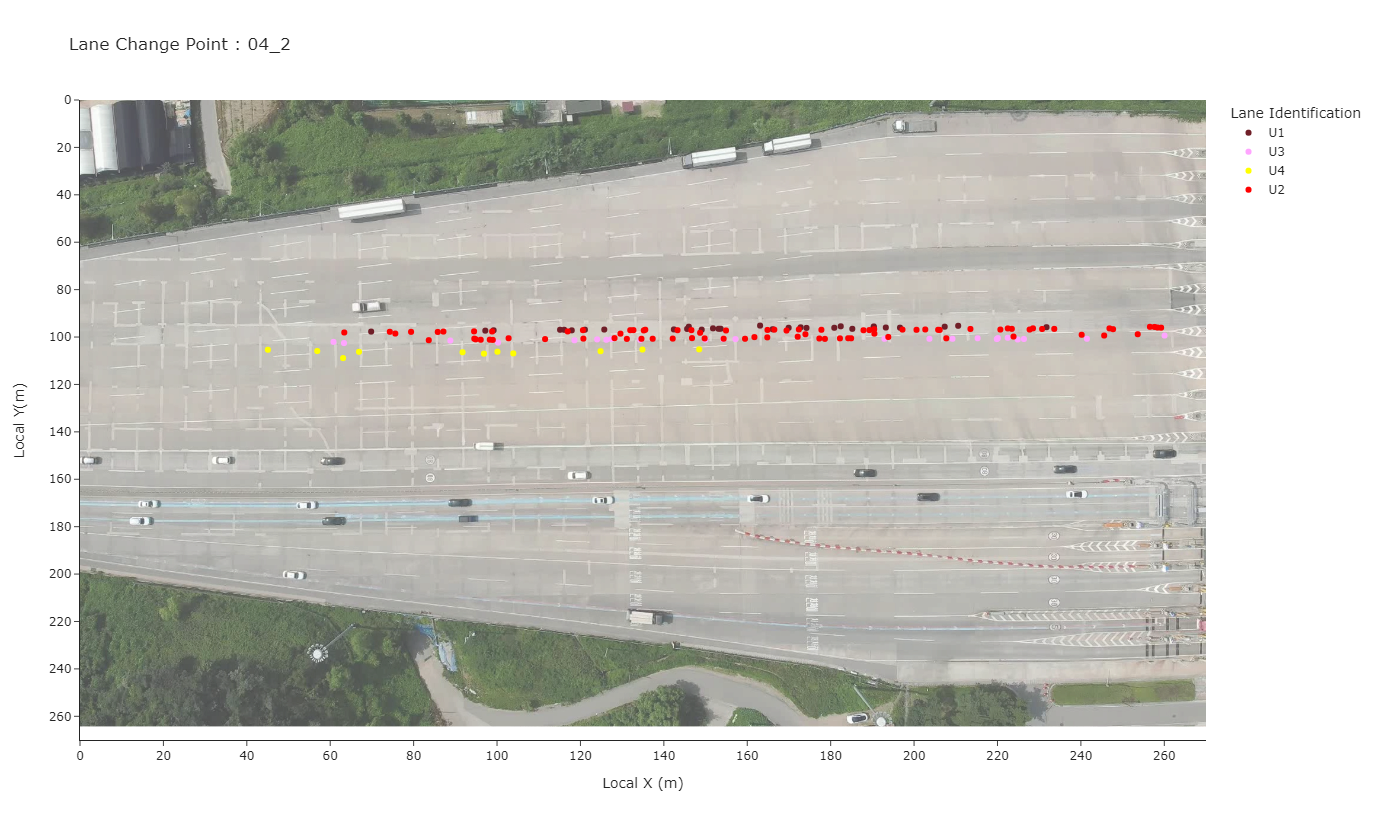

In [41]:
fig = px.scatter(df, x = 'Local X (m)', y = 'Local Y(m)', 
                 color = 'Lane Identification',
                 color_discrete_map = {'U1': 'rgb(112,31,40)', 'U2': 'rgb(255,0,0)', 'U3': 'rgb(255,165,255)', 'U4': 'rgb(255,255,0)'},
                 #opacity = 0.5,
                 title = f'Lane Change Point : {file[:4]}',
                 template = 'simple_white',
                 width = 900,
                 height = 820)
    
fig.update_xaxes(range = [0, 270], dtick = 20)
fig.update_yaxes(range = [270, 0], dtick = 20)
    
fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'
})
    
### 글자 없는 것에 이미지 씌워 저장
        
save_png_name = f'lanechange_point_04_1.png'
save_png_path = os.path.join(save_dir, save_png_name)        
        
fig.write_image(save_png_path)
    
fig.add_layout_image(
    dict(#row = 1,
        #col = 1,
        source = img,
        xref = 'x domain',            
        yref = 'y domain',
        x = 1,
        y = 1,
        xanchor = 'right',
        yanchor = 'top',
        sizex = 1,
        sizey = 1,
        #sizing = "stretch",
        opacity = 0.7,
        layer = "below"))    
    
save_html_name = f'lanechange_point_04_1.html'
save_html_path = os.path.join(save_dir, save_html_name)
    
fig.write_html(file = save_html_path) # html Plotly 파일 저장
        
fig.show()

## 04-2

for file in file_list:
    
    place_name = file[:2]
    img = img_sources[place_name]
    
    file_path = os.path.join(data_dir, file) # 파일리스트의 파일별 경로 설정
    df = pd.read_csv(file_path)
    
    df = df[(df['Lane Identification'] != 'UNKNOWN') & (df['Lane_change'] == 'Change')]

    fig = px.scatter(df, x = 'Local X (m)', y = 'Local Y(m)', 
                     color = 'Lane Identification',
                     #opacity = 0.5,
                     title = f'Lane Change Point : {file[:4]}',
                     template = 'simple_white',
                     width = 900,
                     height = 820,)
    
    fig.update_xaxes(range = [0, 270], dtick = 20)
    fig.update_yaxes(range = [270, 0], dtick = 20)
    
    fig.update_layout({
        'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
        'paper_bgcolor' : 'rgba(0, 0, 0, 0)'
    })
    
    ### 글자 없는 것에 이미지 씌워 저장
        
    save_png_name = f'lanechange_point_{file[-10:-6]}.png'
    save_png_path = os.path.join(save_dir, save_png_name)        
        
    fig.write_image(save_png_path)
    
    fig.add_layout_image(
        dict(#row = 1,
            #col = 1,
            source = img,
            xref = 'x domain',
            yref = 'y domain',
            x = 1,
            y = 1,
            xanchor = 'right',
            yanchor = 'top',
            sizex = 1,
            sizey = 1,
            #sizing = "stretch",
            opacity = 0.7,
            layer = "below"))    
    
    save_html_name = f'lanechange_point_{file[:4]}.html'
    save_html_path = os.path.join(save_dir, save_html_name)
    
    fig.write_html(file = save_html_path) # html Plotly 파일 저장
    
    
fig.show()